In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from fbprophet import Prophet
# Statsmodels widely known for forecasting than Prophet
import statsmodels.api as sm
from scipy import stats
import plotly.offline as py#visualization
py.init_notebook_mode()#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import os
#init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

# plt.style.available
plt.style.use("seaborn-whitegrid")

In [2]:
df = pd.read_csv("Dataset/all_stocks_5yr.csv")
df["date"] = pd.to_datetime(df['date'])
df.head()

date   open   high    low  close    volume Name
0 2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1 2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2 2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3 2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4 2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL

In [3]:
df["Name"].unique();

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619040 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619032 non-null  float64       
 3   low     619032 non-null  float64       
 4   close   619040 non-null  float64       
 5   volume  619040 non-null  int64         
 6   Name    619040 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 33.1+ MB


In [5]:
df_apple = df[df["Name"] == "GS"]
df_apple.index = df_apple["date"]
df_google = df[df["Name"] == "GOOGL"]
df_google.index = df_google["date"]
df_fb = df[df["Name"] == "FB"]
df_fb.index = df_fb["date"]
df_amazon = df[df["Name"] == "AMZN"]
df_amazon.index = df_amazon["date"]
company_list = [df_apple, df_google, df_fb, df_amazon]
comapny_name = ["APPLE", "GOOGLE", "FACEBOOK", "AMAZON"]

In [6]:
print(df_apple.shape)
print(df_google.shape)
print(df_fb.shape)
print(df_apple.shape)

(1259, 7)
(1259, 7)
(1259, 7)
(1259, 7)


In [7]:
df_apple.to_csv("apple.csv")
df_google.to_csv("google.csv")
df_fb.to_csv("fb.csv")
df_amazon.to_csv("amazon.csv")

In [8]:
big_4 = pd.concat([df_apple, df_google, df_fb, df_amazon], axis = 0)
big_4.head()

date    open     high       low   close   volume Name
date                                                                  
2013-02-08 2013-02-08  150.78  151.970  150.3500  151.60  3612229   GS
2013-02-11 2013-02-11  151.42  152.870  150.9601  152.24  3751274   GS
2013-02-12 2013-02-12  152.48  154.320  151.7900  154.11  4307556   GS
2013-02-13 2013-02-13  154.11  154.850  153.2800  154.52  4368576   GS
2013-02-14 2013-02-14  153.84  156.719  153.6200  155.93  5035367   GS

In [9]:
import pandas_profiling as pf
pf.ProfileReport(big_4.drop(["date"], axis = 1))

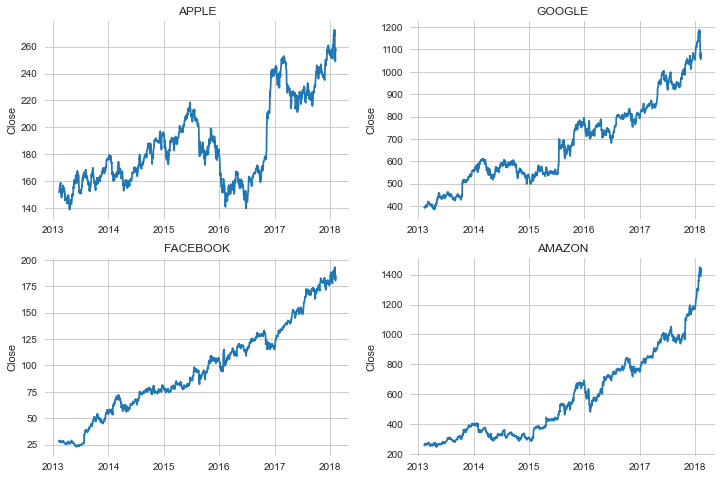

In [10]:
# plot of big_4 close prices

plt.figure(figsize=(12, 8))
#plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    plt.plot(company['date'], company["close"])
    plt.ylabel('Close')
    plt.xlabel(None)
    if i == 1:
        plt.title(f"APPLE")
    elif i == 2:
        plt.title(f"GOOGLE")
    elif i == 3:
        plt.title(f"FACEBOOK")
    else:
        plt.title(f"AMAZON")
    plt.grid()

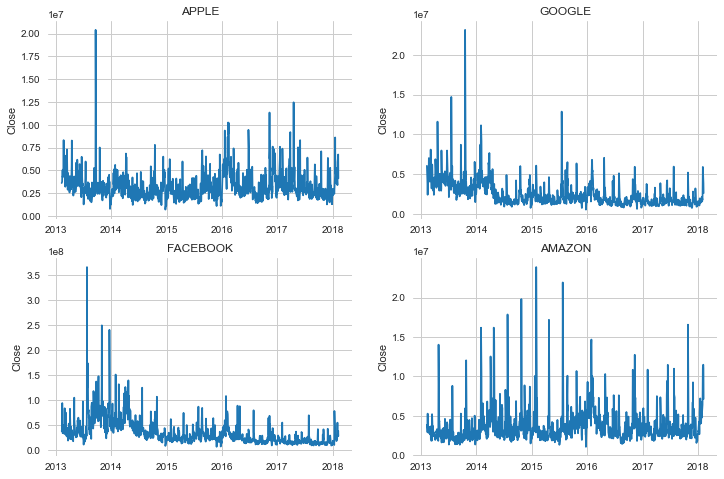

In [11]:
# plot of big_4 close stock volume

plt.figure(figsize=(12, 8))
#plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    plt.plot(company['date'], company["volume"])
    plt.ylabel('Close')
    plt.xlabel(None)
    if i == 1:
        plt.title(f"APPLE")
    elif i == 2:
        plt.title(f"GOOGLE")
    elif i == 3:
        plt.title(f"FACEBOOK")
    else:
        plt.title(f"AMAZON")
    plt.grid()

Name
AMZN     [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
FB       [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
GOOGL    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
GS       [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
dtype: object

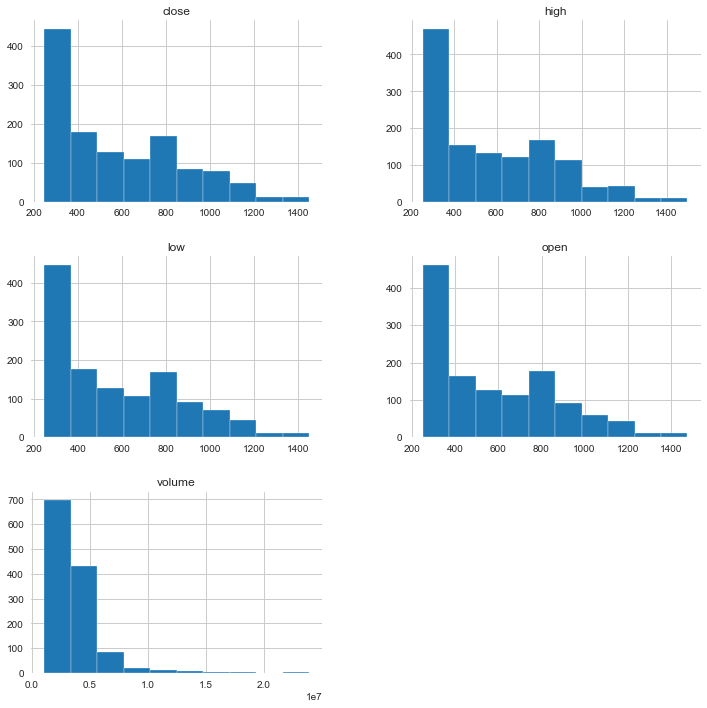

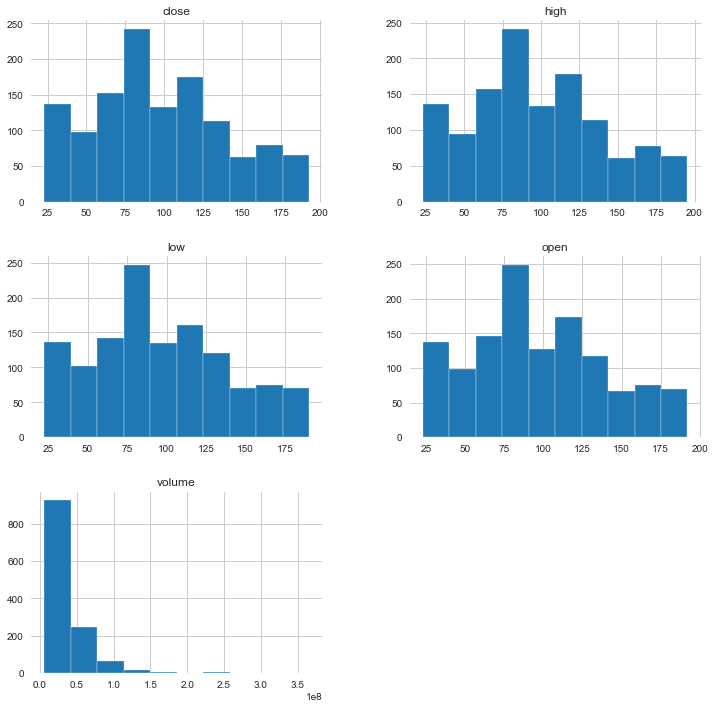

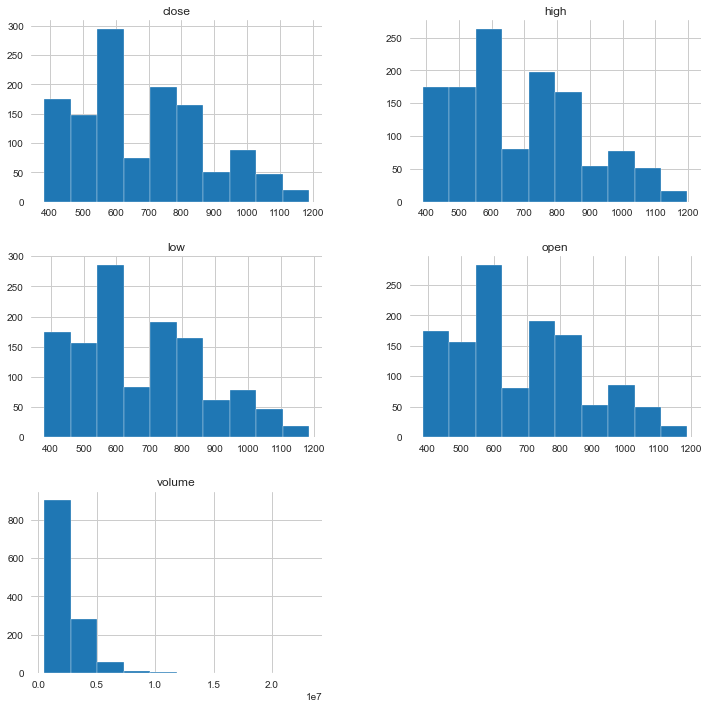

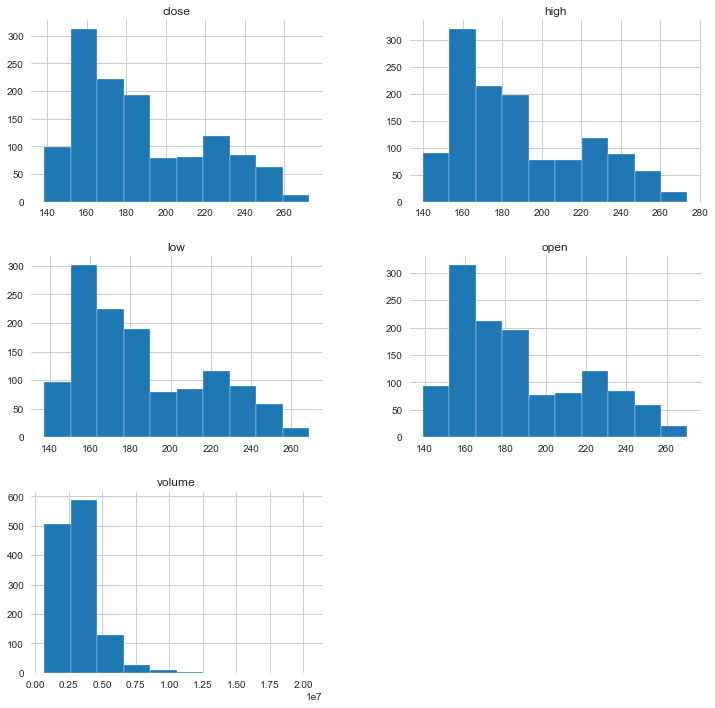

In [12]:
# what are the moving averages for each company stock

moving_average = [10, 20, 50]

for ma in moving_average:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['close'].rolling(ma).mean()
        
        
big_4.groupby("Name").hist(figsize = (12, 12))

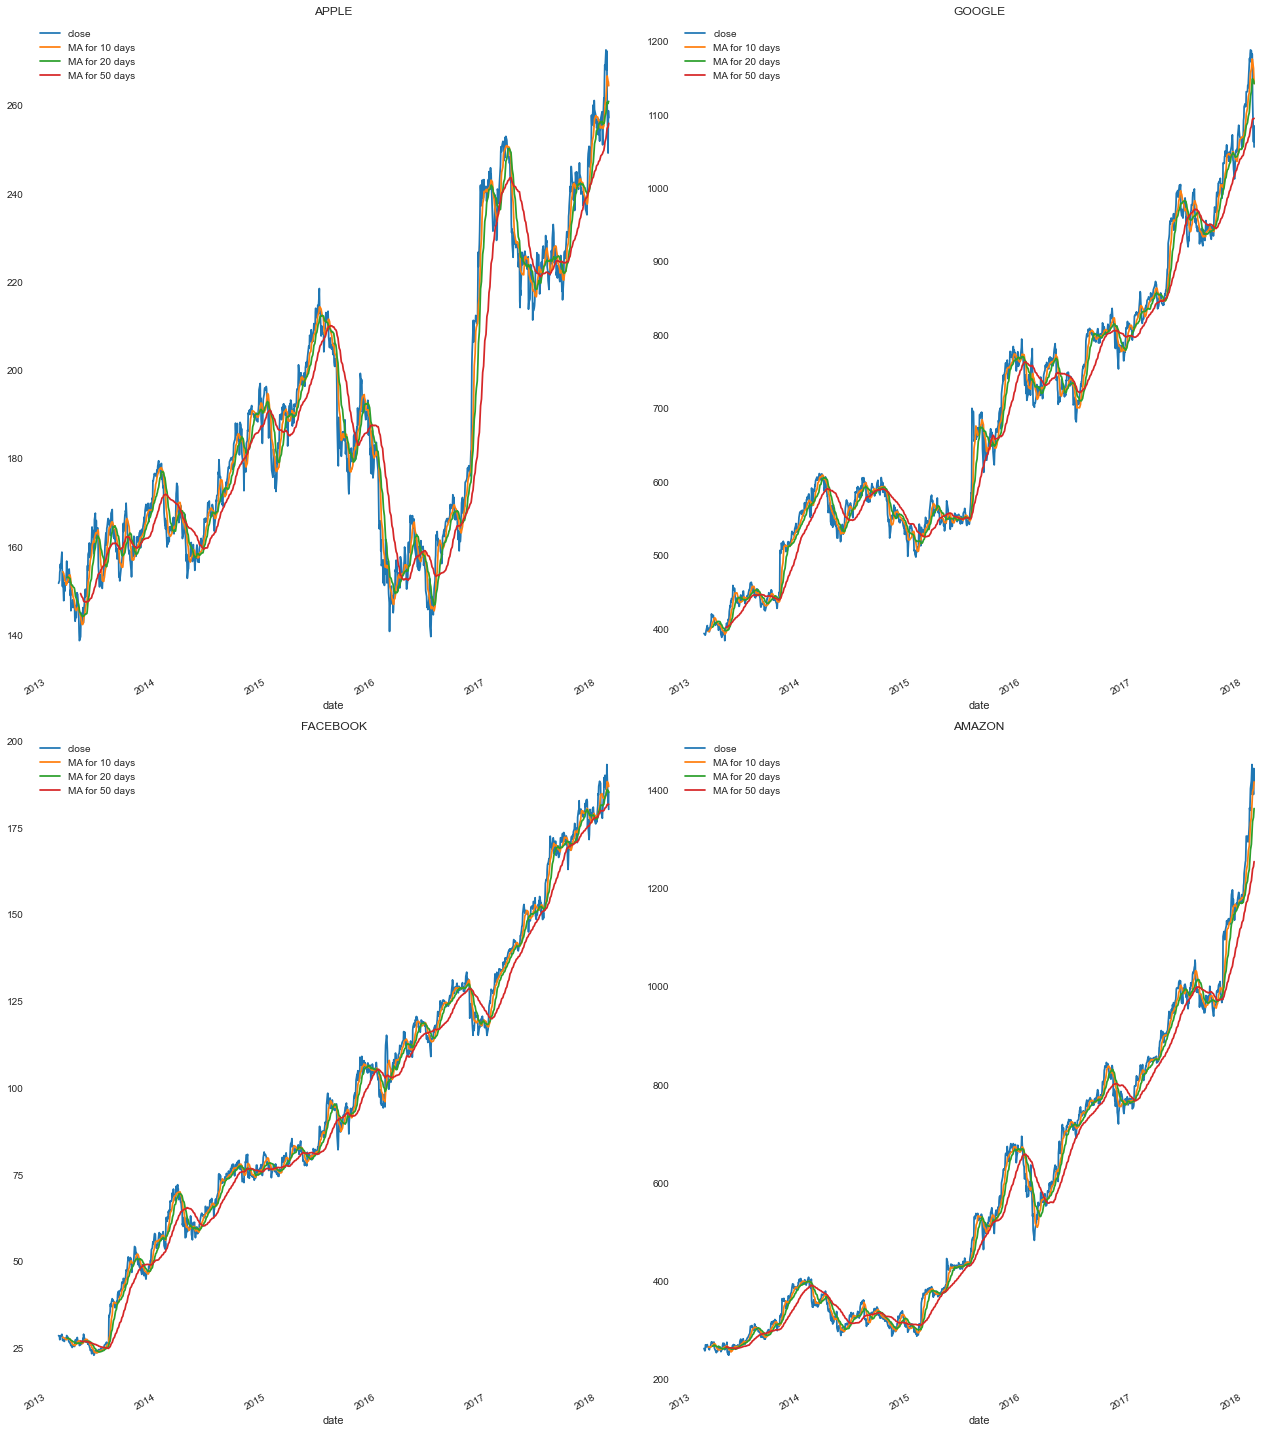

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(18)

df_apple[['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

df_google[['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

df_fb[['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('FACEBOOK')

df_amazon[['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

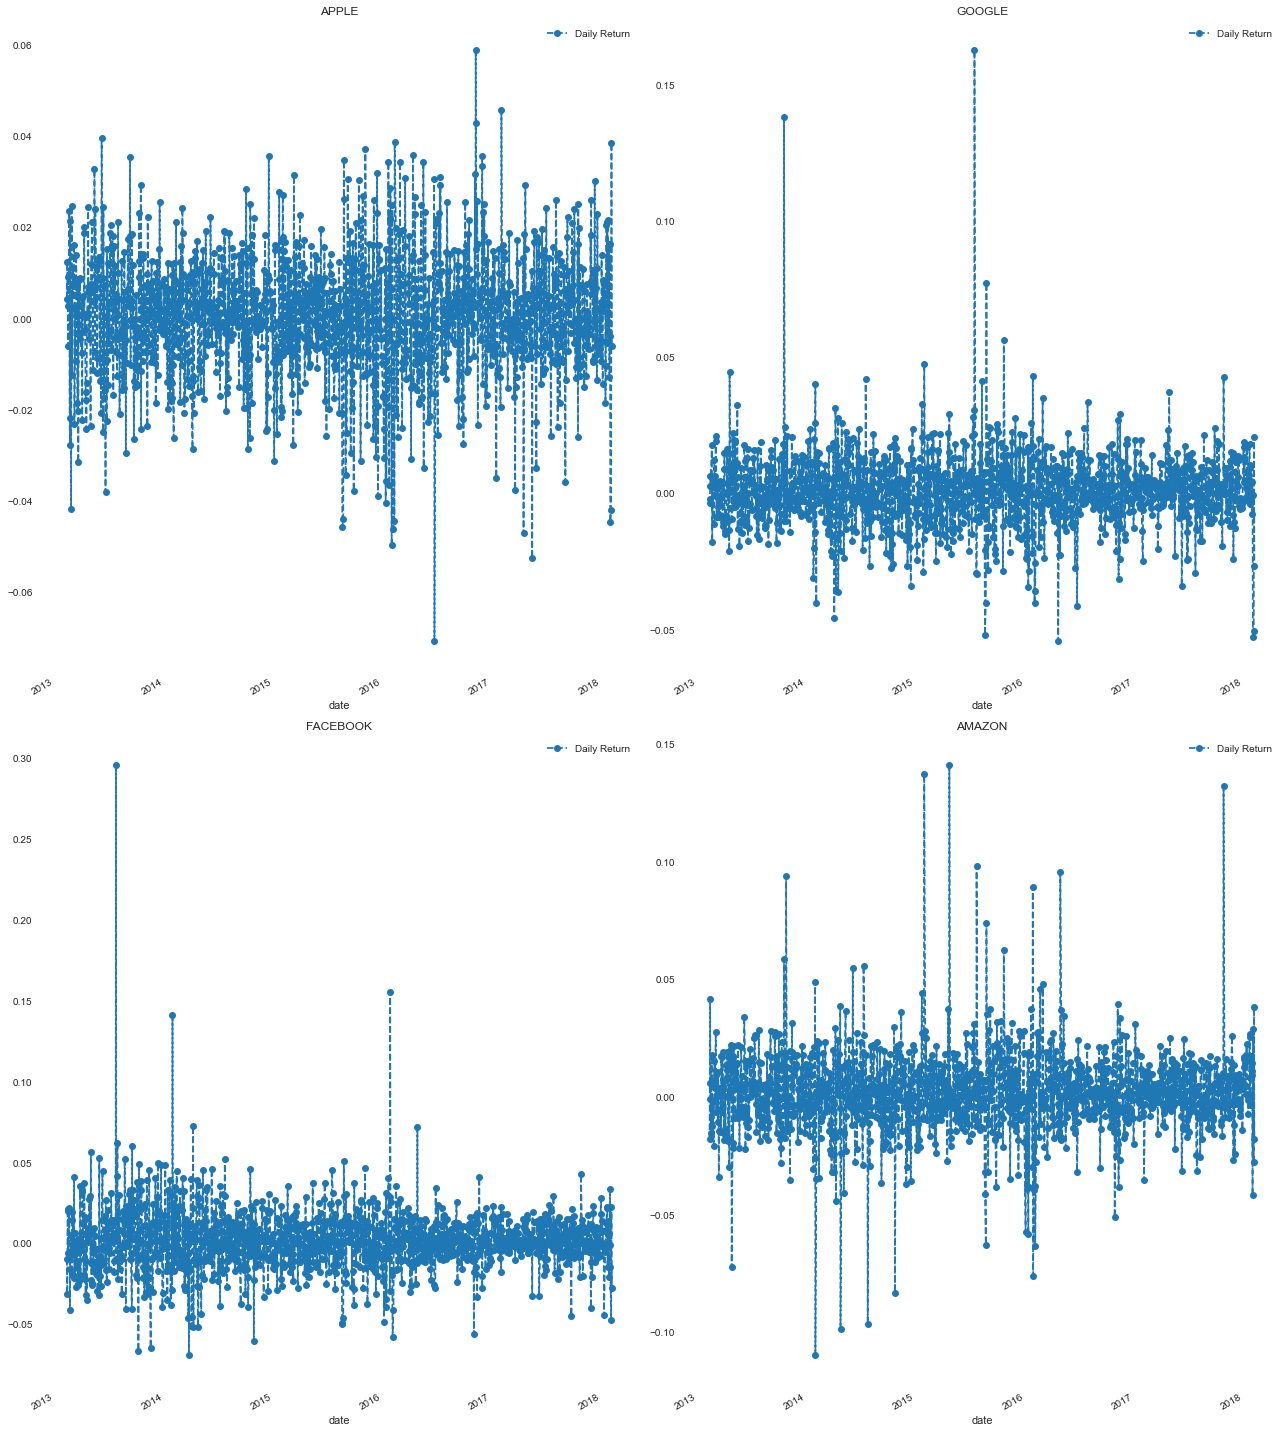

In [14]:
# We will analyze the risk of these companies stock
for company in company_list:
    company['Daily Return'] = company['close'].pct_change()
    
    
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(18)

df_apple['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

df_google['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

df_fb['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('FACEBOOK')

df_amazon['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

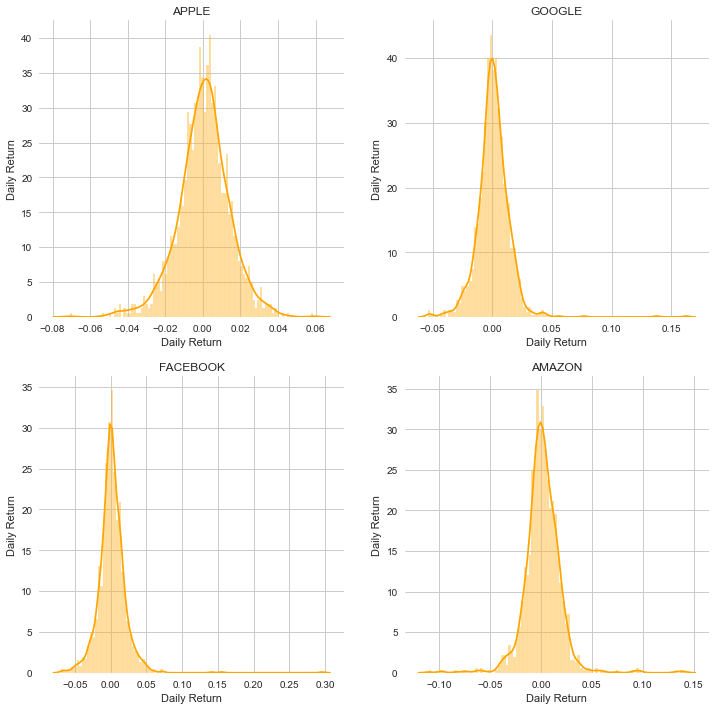

In [15]:
import seaborn as sns

plt.figure(figsize=(12, 12))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='orange')
    plt.ylabel('Daily Return')
    if i == 1:
        plt.title(f"APPLE")
    elif i == 2:
        plt.title(f"GOOGLE")
    elif i == 3:
        plt.title(f"FACEBOOK")
    else:
        plt.title(f"AMAZON")
    plt.grid()


In [16]:
# Predicting Stock prices with LSTM


data_apple = df_apple.filter(["close"])
data_apple = data_apple.values

data_google = df_google.filter(["close"])
data_google = data_google.values

data_amazon = df_amazon.filter(["close"])
data_amazon = data_amazon.values

data_fb = df_fb.filter(["close"])
data_fb = data_fb.values

train_len = int(np.ceil(len(data_apple) * .8))
train_len

1008

### Prophet Introduction:
Prophet is Facebook's library for time series forecasting. In my opinion, Prophet works best with datasets that are higely influenced by seasonality (electricity bills, restaurant visitors etc.)

#### Steps for using Prophet:
<ul>
<li>Make sure you replace closing price for y and date for ds. </li>
<li>Fit that dataframe to Prophet in order to detect future patterns. </li>
<li>Predict the upper and lower prices of the closing price. </li>
</ul>

In [17]:
#Predicting stock prices with Prophet
# Apple Stock

m_apple = Prophet()
m_google = Prophet()
m_fb = Prophet()
m_amazon = Prophet()

# Drop the columns

ph_df_apple = df_apple[["close", "date"]]
ph_df_apple.rename(columns={'close': 'y', 'date': 'ds'}, inplace=True)
train_df_apple, y_df_apple = ph_df_apple[:1000], ph_df_apple[1000:]

ph_df_google = df_google[["close", "date"]]
ph_df_google.rename(columns={'close': 'y', 'date': 'ds'}, inplace=True)
train_df_google, y_df_google = ph_df_google[:1000], ph_df_google[1000:]

ph_df_amazon = df_amazon[["close", "date"]]
ph_df_amazon.rename(columns={'close': 'y', 'date': 'ds'}, inplace=True)
train_df_amazon, y_df_amazon = ph_df_amazon[:1000], ph_df_amazon[1000:]

ph_df_fb = df_apple[["close", "date"]]
ph_df_fb.rename(columns={'close': 'y', 'date': 'ds'}, inplace=True)
train_df_fb, y_df_fb = ph_df_fb[:1000], ph_df_fb[1000:]


train_df_fb.head()

y         ds
date                         
2013-02-08  151.60 2013-02-08
2013-02-11  152.24 2013-02-11
2013-02-12  154.11 2013-02-12
2013-02-13  154.52 2013-02-13
2013-02-14  155.93 2013-02-14

In [18]:
m_apple.fit(train_df_apple)
m_google.fit(train_df_google)
m_fb.fit(train_df_fb)
m_amazon.fit(train_df_amazon)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [19]:
forcast_apple = m_apple.predict(y_df_apple[["ds"]])
forcast_fb = m_fb.predict(y_df_fb[["ds"]])
forcast_google = m_google.predict(y_df_google[["ds"]])
forcast_amazon = m_amazon.predict(y_df_amazon[["ds"]])


forcast_apple.index = forcast_apple['ds']
forcast_google.index = forcast_google['ds']
forcast_fb.index = forcast_fb['ds']
forcast_amazon.index = forcast_amazon["ds"]

In [20]:
ph_df_y_apple = ph_df_apple[["y"]]
ph_df_y_google = ph_df_google[["y"]]
ph_df_y_amazon = ph_df_amazon[["y"]]
ph_df_y_fb = ph_df_fb[["y"]]

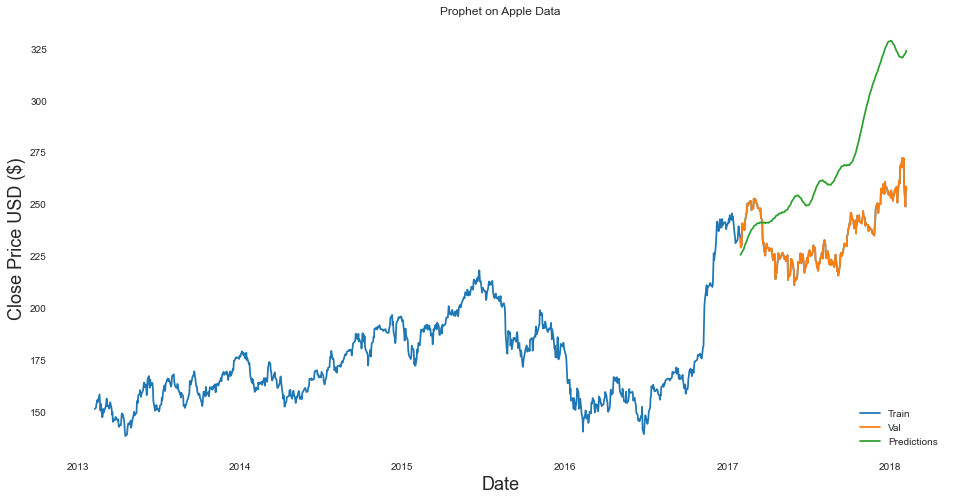

In [21]:
# Plot the data
train_ph_apple = ph_df_apple["y"].values
valid_ph_apple = ph_df_apple['y'][1000:].values
pred = forcast_apple
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Prophet on Apple Data')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(ph_df_y_apple['y'])
plt.plot(ph_df_y_apple['y'][1000:])
plt.plot(pred["yhat"])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


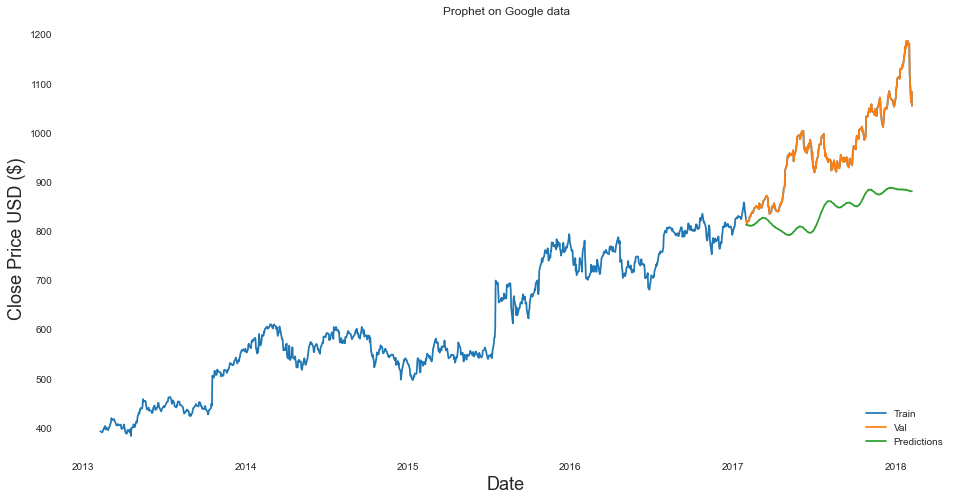

In [22]:
# Plot the data
train_ph_google = ph_df_google["y"].values
valid_ph_google = ph_df_google['y'][1000:].values
pred_google = forcast_google
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Prophet on Google data')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(ph_df_y_google['y'])
plt.plot(ph_df_y_google['y'][1000:])
plt.plot(pred_google["yhat"])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

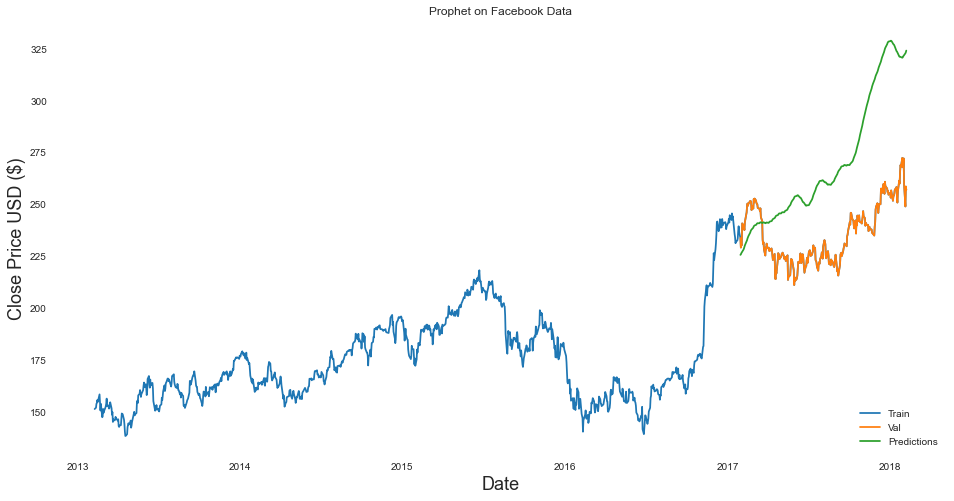

In [23]:
# Plot the data
train_ph_fb = ph_df_fb["y"].values
valid_ph_fb = ph_df_fb['y'][1000:].values
pred_fb = forcast_fb
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Prophet on Facebook Data')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(ph_df_y_fb['y'])
plt.plot(ph_df_y_fb['y'][1000:])
plt.plot(pred_fb["yhat"])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

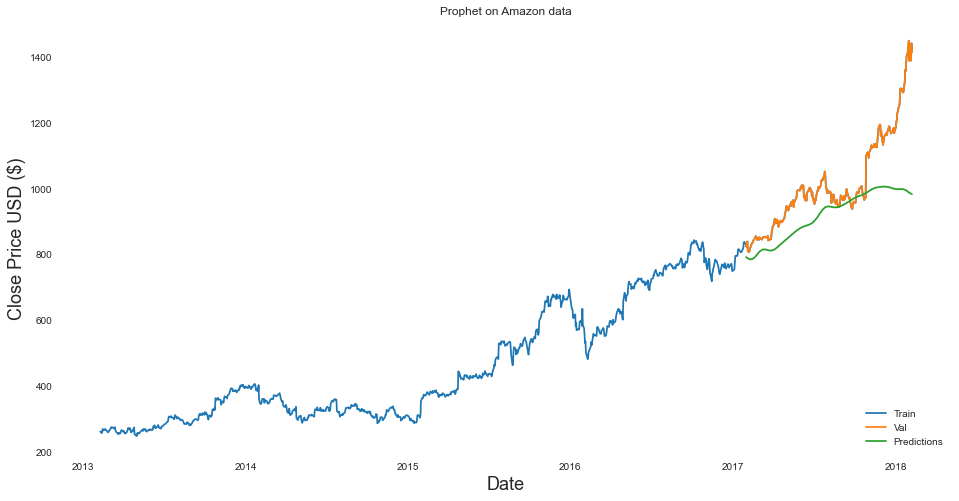

In [24]:
# Plot the data
train_ph_amazon = ph_df_amazon["y"].values
valid_ph_amazon = ph_df_amazon['y'][1000:].values
pred_amazon = forcast_amazon
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Prophet on Amazon data')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(ph_df_y_amazon['y'])
plt.plot(ph_df_y_amazon['y'][1000:])
plt.plot(pred_amazon["yhat"])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

## Reccurent Neural Network

In [25]:
seed = 42
np.random.seed(seed)

# APPLE LSTM

In [26]:
df_apple = pd.read_csv("apple.csv")
df_apple = df_apple.drop(['date.1'], axis = 1)
df_apple['date'] =  pd.to_datetime(df_apple['date'])

In [27]:
df_apple.head()

date    open     high       low   close   volume Name
0 2013-02-08  150.78  151.970  150.3500  151.60  3612229   GS
1 2013-02-11  151.42  152.870  150.9601  152.24  3751274   GS
2 2013-02-12  152.48  154.320  151.7900  154.11  4307556   GS
3 2013-02-13  154.11  154.850  153.2800  154.52  4368576   GS
4 2013-02-14  153.84  156.719  153.6200  155.93  5035367   GS

In [28]:
df_apple.index = df_apple['date']
df_apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2013-02-08 to 2018-02-07
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1259 non-null   datetime64[ns]
 1   open    1259 non-null   float64       
 2   high    1259 non-null   float64       
 3   low     1259 non-null   float64       
 4   close   1259 non-null   float64       
 5   volume  1259 non-null   int64         
 6   Name    1259 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 78.7+ KB


In [29]:
df_apple_ = df_apple['close']

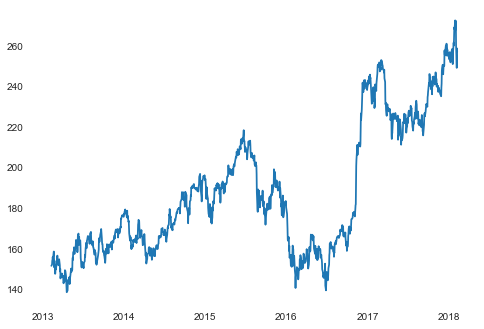

In [30]:
plt.plot(df_apple_)

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df_apple_scale = scaler.fit_transform(np.array(df_apple_).reshape(-1,1))

In [32]:
print(df_apple_scale)

[[0.09710188]
 [0.10188228]
 [0.11585001]
 ...
 [0.82544069]
 [0.897072  ]
 [0.885121  ]]


In [33]:
train_size_apple = int(len(df_apple_scale)*0.70)
test_size_apple = len(df_apple_scale)-train_size_apple
train_data_apple, test_data_apple = df_apple_scale[0:train_size_apple,:], df_apple_scale[train_size_apple:len(df_apple_scale),:1]

In [34]:
train_size_apple, test_size_apple

(881, 378)

In [35]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [36]:
time_step = 60
X_train_apple, y_train_apple = create_dataset(train_data_apple, time_step)
X_test_apple, y_test_apple = create_dataset(test_data_apple, time_step)

In [37]:
valid_apple_ = scaler.inverse_transform(y_test_apple.reshape(-1, 1))
train_app_ = scaler.inverse_transform(y_train_apple.reshape(-1, 1))

In [38]:
print(X_train_apple.shape), print(y_train_apple.shape)

(820, 60)
(820,)


(None, None)

In [39]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train_apple = X_train_apple.reshape(X_train_apple.shape[0],X_train_apple.shape[1] , 1)
X_test_apple = X_test_apple.reshape(X_test_apple.shape[0],X_test_apple.shape[1] , 1)

In [40]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(60,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.fit(X_train_apple,y_train_apple,validation_data=(X_test_apple,y_test_apple),epochs=30,batch_size=15,verbose=1)

Epoch 1/30
55/55 [==============================] - 1s 26ms/step - loss: 0.0081 - val_loss: 0.0152
Epoch 2/30
55/55 [==============================] - 1s 10ms/step - loss: 0.0021 - val_loss: 0.0042
Epoch 3/30
55/55 [==============================] - 1s 11ms/step - loss: 0.0021 - val_loss: 0.0074
Epoch 4/30
55/55 [==============================] - 1s 11ms/step - loss: 0.0017 - val_loss: 0.0029
Epoch 5/30
55/55 [==============================] - 1s 11ms/step - loss: 0.0016 - val_loss: 0.0053
Epoch 6/30
55/55 [==============================] - 1s 10ms/step - loss: 0.0014 - val_loss: 0.0025
Epoch 7/30
55/55 [==============================] - 1s 10ms/step - loss: 0.0013 - val_loss: 0.0027
Epoch 8/30
55/55 [==============================] - 1s 10ms/step - loss: 0.0013 - val_loss: 0.0038
Epoch 9/30
55/55 [==============================] - 1s 10ms/step - loss: 0.0011 - val_loss: 0.0024
Epoch 10/30
55/55 [==============================] - 1s 10ms/step - loss: 0.0011 - val_loss: 0.0020
Epoch 11/

In [43]:
pred = model.predict(X_test_apple)
pred = scaler.inverse_transform(pred) # reverse scaling

In [44]:
prediction_apple = pd.DataFrame(valid_apple_, columns = ['Y_test'])
prediction_apple["pred"] = pred

In [45]:
prediction_apple.head(10)

Y_test        pred
0  176.58  178.510757
1  176.21  177.939240
2  175.92  177.169006
3  181.48  176.551849
4  181.92  178.622498
5  192.63  181.077118
6  200.87  187.547455
7  203.94  196.928757
8  209.18  204.372299
9  211.19  209.982391

In [46]:
from sklearn.metrics import mean_squared_error
rmse_apple = np.sqrt(mean_squared_error(prediction_apple["Y_test"], prediction_apple["pred"]))
rmse_apple

3.5425673276718808

In [47]:
X_train_apple.shape

(820, 60, 1)

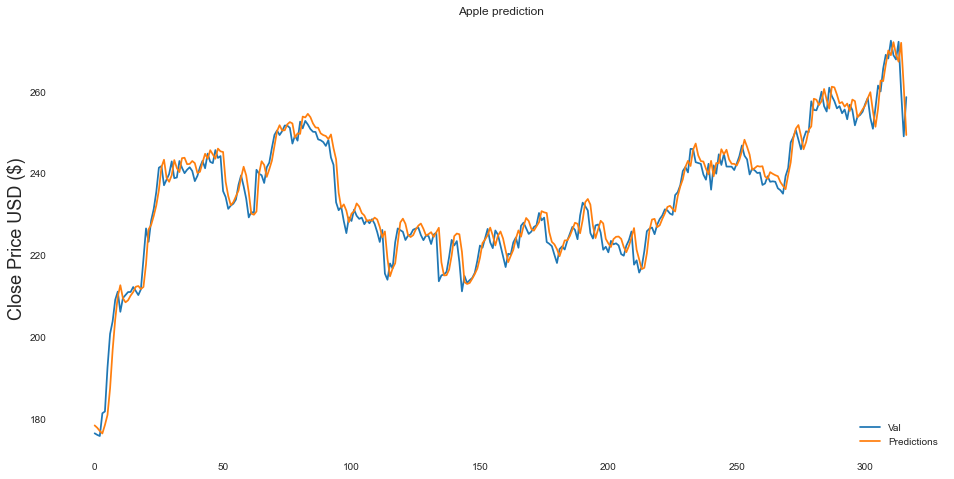

In [48]:
# Plot the data
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Apple prediction')
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(prediction_apple[['Y_test', 'pred']])
plt.legend(['Val', 'Predictions'], loc='lower right')
plt.show()

# GOOGLE LSTM

In [49]:
df_google = pd.read_csv("google.csv")
df_google = df_google.drop(['date.1'], axis = 1)
df_google['date'] =  pd.to_datetime(df_google['date'])

In [50]:
df_google.head()

date      open      high       low     close   volume   Name
0 2013-02-08  390.4551  393.7283  390.1698  393.0777  6031199  GOOGL
1 2013-02-11  389.5892  391.8915  387.2619  391.6012  4330781  GOOGL
2 2013-02-12  391.2659  394.3440  390.0747  390.7403  3714176  GOOGL
3 2013-02-13  390.4551  393.0677  390.3750  391.8214  2393946  GOOGL
4 2013-02-14  390.2549  394.7644  389.2739  394.3039  3466971  GOOGL

In [51]:
df_google.index = df_google['date']
df_google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2013-02-08 to 2018-02-07
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1259 non-null   datetime64[ns]
 1   open    1259 non-null   float64       
 2   high    1259 non-null   float64       
 3   low     1259 non-null   float64       
 4   close   1259 non-null   float64       
 5   volume  1259 non-null   int64         
 6   Name    1259 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 78.7+ KB


In [52]:
df_google_ = df_google['close']

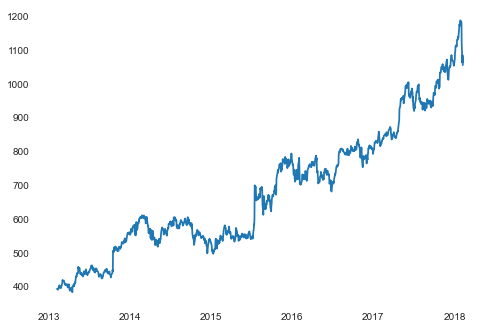

In [53]:
plt.plot(df_google_)

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df_google_scale = scaler.fit_transform(np.array(df_google_).reshape(-1,1))

In [55]:
print(df_google_scale)

[[0.01210825]
 [0.01027231]
 [0.00920184]
 ...
 [0.84435851]
 [0.87176395]
 [0.83567929]]


In [56]:
train_size_google = int(len(df_google_scale)*0.70)
test_size_google = len(df_google_scale)-train_size_google
train_data_google, test_data_google = df_google_scale[0:train_size_google,:], df_google_scale[train_size_google:len(df_google_scale),:1]

In [57]:
train_size_google, test_size_google

(881, 378)

In [58]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [59]:
time_step = 60
X_train_google, y_train_google = create_dataset(train_data_google, time_step)
X_test_google, y_test_google = create_dataset(test_data_google, time_step)

In [60]:
valid_google_ = scaler.inverse_transform(y_test_google.reshape(-1, 1))
train_goo_ = scaler.inverse_transform(y_train_google.reshape(-1, 1))

In [61]:
print(X_train_google.shape), print(y_train_google.shape)

(820, 60)
(820,)


(None, None)

In [62]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train_google = X_train_google.reshape(X_train_google.shape[0],X_train_google.shape[1] , 1)
X_test_google = X_test_google.reshape(X_test_google.shape[0],X_test_google.shape[1] , 1)

In [63]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(60,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [64]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [65]:
model.fit(X_train_google,y_train_google,validation_data=(X_test_google,y_test_google),epochs=30,batch_size=15,verbose=1)

Epoch 1/30
55/55 [==============================] - 1s 24ms/step - loss: 0.0074 - val_loss: 0.0012
Epoch 2/30
55/55 [==============================] - 1s 13ms/step - loss: 9.7902e-04 - val_loss: 0.0025
Epoch 3/30
55/55 [==============================] - 1s 10ms/step - loss: 9.3092e-04 - val_loss: 0.0013
Epoch 4/30
55/55 [==============================] - 1s 10ms/step - loss: 8.2090e-04 - val_loss: 0.0012
Epoch 5/30
55/55 [==============================] - 1s 10ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 6/30
55/55 [==============================] - 1s 10ms/step - loss: 8.0542e-04 - val_loss: 0.0053
Epoch 7/30
55/55 [==============================] - 1s 10ms/step - loss: 7.2864e-04 - val_loss: 9.5100e-04
Epoch 8/30
55/55 [==============================] - 1s 13ms/step - loss: 7.2952e-04 - val_loss: 0.0013
Epoch 9/30
55/55 [==============================] - 1s 15ms/step - loss: 6.7227e-04 - val_loss: 0.0037
Epoch 10/30
55/55 [==============================] - 1s 18ms/step - loss: 6.2

In [66]:
pred = model.predict(X_test_google)
pred = scaler.inverse_transform(pred)

In [67]:
prediction_google = pd.DataFrame(valid_google_, columns = ['Y_test'])
prediction_google["pred"] = pred

In [68]:
prediction_google.head(10)

Y_test        pred
0  788.42  812.576721
1  782.19  801.749939
2  781.10  791.793030
3  802.03  787.586060
4  811.98  798.422974
5  805.59  813.853088
6  780.29  818.143066
7  771.75  801.962463
8  753.22  782.864990
9  775.16  764.777893

In [69]:
from sklearn.metrics import mean_squared_error
rmse_google = np.sqrt(mean_squared_error(prediction_google["Y_test"], prediction_google["pred"]))
rmse_google

12.767987704236669

In [70]:
X_train_apple.shape

(820, 60, 1)

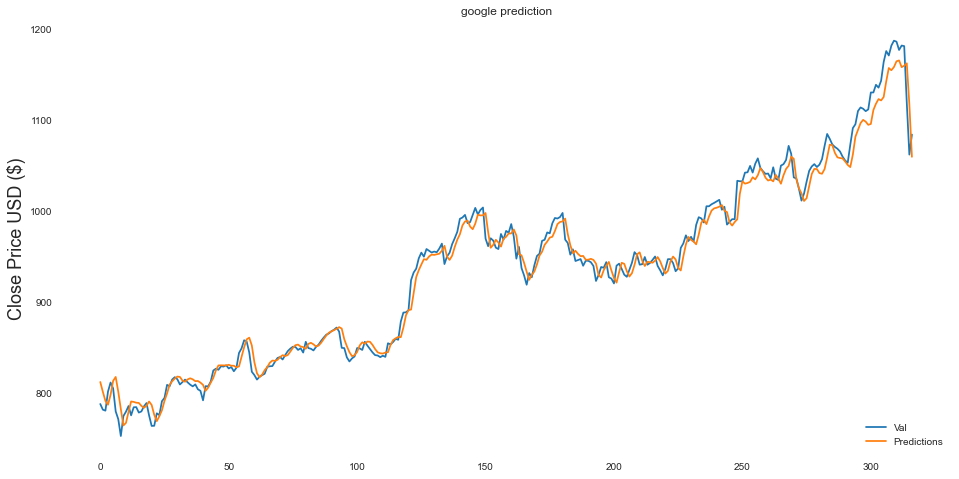

In [71]:
# Plot the data
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('google prediction')
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(prediction_google[['Y_test', 'pred']])
plt.legend(['Val', 'Predictions'], loc='lower right')
plt.show()

# FACEBOOK LSTM

In [72]:
df_fb = pd.read_csv("fb.csv")
df_fb = df_fb.drop(['date.1'], axis = 1)
df_fb['date'] =  pd.to_datetime(df_fb['date'])

In [73]:
df_fb.head()

date   open   high    low    close    volume Name
0 2013-02-08  28.89  29.17  28.51  28.5450  37662614   FB
1 2013-02-11  28.61  28.68  28.04  28.2600  36979533   FB
2 2013-02-12  27.67  28.16  27.10  27.3700  93417215   FB
3 2013-02-13  27.36  28.32  27.31  27.9075  50100805   FB
4 2013-02-14  28.02  28.63  28.01  28.5000  35581045   FB

In [74]:
df_fb.index = df_fb['date']
df_fb.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2013-02-08 to 2018-02-07
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1259 non-null   datetime64[ns]
 1   open    1259 non-null   float64       
 2   high    1259 non-null   float64       
 3   low     1259 non-null   float64       
 4   close   1259 non-null   float64       
 5   volume  1259 non-null   int64         
 6   Name    1259 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 78.7+ KB


In [75]:
df_fb_ = df_fb['close']

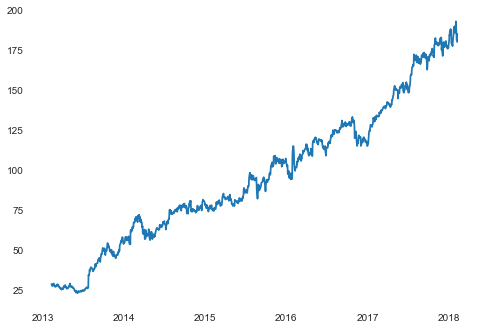

In [76]:
plt.plot(df_fb_)

In [77]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df_fb_scale = scaler.fit_transform(np.array(df_fb_).reshape(-1,1))

In [78]:
print(df_fb_scale)

[[0.03317449]
 [0.0314999 ]
 [0.02627048]
 ...
 [0.93048986]
 [0.95428665]
 [0.92414405]]


In [79]:
train_size_fb = int(len(df_fb_scale)*0.70)
test_size_fb = len(df_fb_scale)-train_size_fb
train_data_fb, test_data_fb = df_fb_scale[0:train_size_fb,:], df_fb_scale[train_size_fb:len(df_fb_scale),:1]

In [80]:
train_size_fb, test_size_fb

(881, 378)

In [81]:
time_step = 60
X_train_fb, y_train_fb = create_dataset(train_data_fb, time_step)
X_test_fb, y_test_fb = create_dataset(test_data_fb, time_step)

In [82]:
valid_fb_ = scaler.inverse_transform(y_test_fb.reshape(-1, 1))
train_fb_ = scaler.inverse_transform(y_train_fb.reshape(-1, 1))

In [83]:
print(X_train_fb.shape), print(y_train_fb.shape)

(820, 60)
(820,)


(None, None)

In [84]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train_fb = X_train_fb.reshape(X_train_fb.shape[0],X_train_fb.shape[1] , 1)
X_test_fb = X_test_fb.reshape(X_test_fb.shape[0],X_test_fb.shape[1] , 1)

In [85]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(60,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [86]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [87]:
model.fit(X_train_fb,y_train_fb,validation_data=(X_test_fb,y_test_fb),epochs=30,batch_size=15,verbose=1)

Epoch 1/30
55/55 [==============================] - 1s 21ms/step - loss: 0.0087 - val_loss: 8.6868e-04
Epoch 2/30
55/55 [==============================] - 1s 11ms/step - loss: 5.5410e-04 - val_loss: 0.0011
Epoch 3/30
55/55 [==============================] - 1s 10ms/step - loss: 5.3806e-04 - val_loss: 0.0012
Epoch 4/30
55/55 [==============================] - 1s 10ms/step - loss: 5.3089e-04 - val_loss: 0.0026
Epoch 5/30
55/55 [==============================] - 1s 10ms/step - loss: 5.4316e-04 - val_loss: 8.1720e-04
Epoch 6/30
55/55 [==============================] - 1s 10ms/step - loss: 5.0701e-04 - val_loss: 7.8884e-04
Epoch 7/30
55/55 [==============================] - 1s 10ms/step - loss: 4.8989e-04 - val_loss: 0.0013
Epoch 8/30
55/55 [==============================] - 1s 10ms/step - loss: 4.4988e-04 - val_loss: 0.0032
Epoch 9/30
55/55 [==============================] - 1s 10ms/step - loss: 4.5909e-04 - val_loss: 0.0012
Epoch 10/30
55/55 [==============================] - 1s 10ms/step

In [88]:
pred = model.predict(X_test_fb)
pred = scaler.inverse_transform(pred)

In [89]:
prediction_fb = pd.DataFrame(valid_fb_, columns = ['Y_test'])
prediction_fb["pred"] = pred

In [90]:
prediction_fb.head(10)

Y_test        pred
0  127.17  133.383133
1  120.00  132.674744
2  120.75  130.974701
3  122.15  128.895172
4  124.22  127.072166
5  123.18  125.964294
6  120.80  125.394188
7  119.02  124.950691
8  115.08  124.389954
9  117.20  123.351074

In [91]:
from sklearn.metrics import mean_squared_error
rmse_fb = np.sqrt(mean_squared_error(prediction_fb["Y_test"], prediction_fb["pred"]))
rmse_fb

3.1544359764857277

In [92]:
X_train_fb.shape

(820, 60, 1)

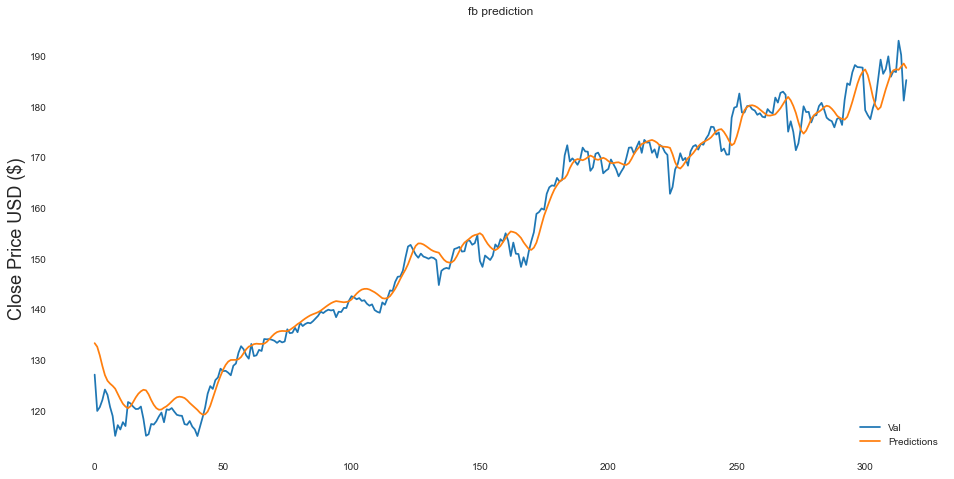

In [93]:
# Plot the data
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('fb prediction')
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(prediction_fb[['Y_test', 'pred']])
plt.legend(['Val', 'Predictions'], loc='lower right')
plt.show()

# AMAZON LSTM

In [94]:
df_amazon = pd.read_csv("amazon.csv")
df_amazon = df_amazon.drop(['date.1'], axis = 1)
df_amazon['date'] =  pd.to_datetime(df_amazon['date'])

In [95]:
df_amazon.head()

date    open    high      low   close   volume  Name
0 2013-02-08  261.40  265.25  260.555  261.95  3879078  AMZN
1 2013-02-11  263.20  263.25  256.600  257.21  3403403  AMZN
2 2013-02-12  259.19  260.16  257.000  258.70  2938660  AMZN
3 2013-02-13  261.53  269.96  260.300  269.47  5292996  AMZN
4 2013-02-14  267.37  270.65  265.400  269.24  3462780  AMZN

In [96]:
df_amazon.index = df_amazon['date']
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2013-02-08 to 2018-02-07
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1259 non-null   datetime64[ns]
 1   open    1259 non-null   float64       
 2   high    1259 non-null   float64       
 3   low     1259 non-null   float64       
 4   close   1259 non-null   float64       
 5   volume  1259 non-null   int64         
 6   Name    1259 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 78.7+ KB


In [97]:
df_amazon_ = df_amazon['close']

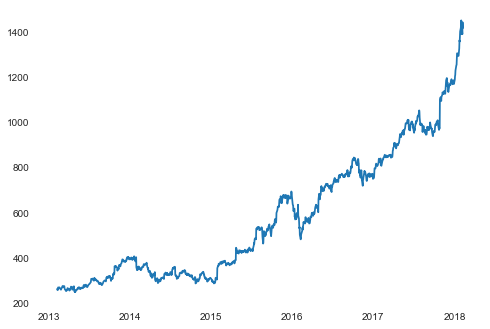

In [98]:
plt.plot(df_amazon_)

In [99]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df_amazon_scale = scaler.fit_transform(np.array(df_amazon_).reshape(-1,1))

In [100]:
print(df_amazon_scale)

[[0.01140805]
 [0.00746678]
 [0.0087057 ]
 ...
 [0.94937056]
 [0.9933065 ]
 [0.97163787]]


In [101]:
train_size_amazon = int(len(df_amazon_scale)*0.70)
test_size_amazon = len(df_amazon_scale)-train_size_amazon
train_data_amazon, test_data_amazon = df_amazon_scale[0:train_size_amazon,:], df_amazon_scale[train_size_amazon:len(df_amazon_scale),:1]

In [102]:
train_size_amazon, test_size_amazon

(881, 378)

In [103]:
time_step = 60
X_train_amazon, y_train_amazon = create_dataset(train_data_amazon, time_step)
X_test_amazon, y_test_amazon = create_dataset(test_data_amazon, time_step)

In [104]:
valid_amazon_ = scaler.inverse_transform(y_test_amazon.reshape(-1, 1))
train_ama_ = scaler.inverse_transform(y_train_amazon.reshape(-1, 1))

In [105]:
print(X_train_amazon.shape), print(y_train_amazon.shape)

(820, 60)
(820,)


(None, None)

In [106]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train_amazon = X_train_amazon.reshape(X_train_amazon.shape[0],X_train_amazon.shape[1] , 1)
X_test_amazon = X_test_amazon.reshape(X_test_amazon.shape[0],X_test_amazon.shape[1] , 1)

In [107]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(60,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [108]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
lstm_10 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
lstm_11 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [109]:
model.fit(X_train_amazon,y_train_amazon,validation_data=(X_test_amazon,y_test_amazon),epochs=30,batch_size=15,verbose=1)

Epoch 1/30
55/55 [==============================] - 2s 29ms/step - loss: 0.0051 - val_loss: 0.0027
Epoch 2/30
55/55 [==============================] - 1s 12ms/step - loss: 5.3754e-04 - val_loss: 0.0015
Epoch 3/30
55/55 [==============================] - 1s 10ms/step - loss: 4.9868e-04 - val_loss: 0.0013
Epoch 4/30
55/55 [==============================] - 1s 12ms/step - loss: 4.0540e-04 - val_loss: 0.0013
Epoch 5/30
55/55 [==============================] - 1s 10ms/step - loss: 4.5470e-04 - val_loss: 0.0013
Epoch 6/30
55/55 [==============================] - 1s 10ms/step - loss: 4.0248e-04 - val_loss: 0.0024
Epoch 7/30
55/55 [==============================] - 1s 10ms/step - loss: 3.3561e-04 - val_loss: 0.0015
Epoch 8/30
55/55 [==============================] - 1s 10ms/step - loss: 3.1267e-04 - val_loss: 0.0046
Epoch 9/30
55/55 [==============================] - 1s 10ms/step - loss: 3.6844e-04 - val_loss: 0.0019
Epoch 10/30
55/55 [==============================] - 1s 10ms/step - loss: 2.9

In [110]:
pred = model.predict(X_test_amazon)
pred = scaler.inverse_transform(pred)

In [111]:
prediction_amazon = pd.DataFrame(valid_amazon_, columns = ['Y_test'])
prediction_amazon["pred"] = pred

In [112]:
prediction_amazon.head(10)

Y_test        pred
0  765.56  780.789612
1  767.03  767.509827
2  755.05  757.436951
3  784.93  749.464661
4  787.75  749.797607
5  771.88  756.941528
6  742.38  763.821899
7  739.01  762.364929
8  719.07  753.818604
9  743.24  738.965332

In [113]:
from sklearn.metrics import mean_squared_error
rmse_amazon = np.sqrt(mean_squared_error(prediction_amazon["Y_test"], prediction_amazon["pred"]))
rmse_amazon

35.043788816842195

In [114]:
X_train_amazon.shape

(820, 60, 1)

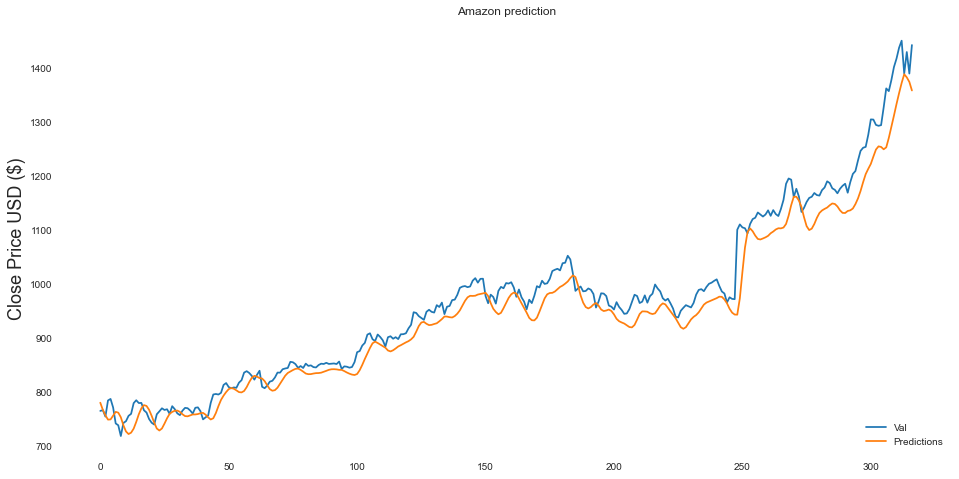

In [115]:
# Plot the data
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Amazon prediction')
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(prediction_amazon[['Y_test', 'pred']])
plt.legend(['Val', 'Predictions'], loc='lower right')
plt.show()